# OCR

* 이미지에서 텍스트 추출

In [1]:
# pip install paddlepaddle paddleocr

## 1. 이미지 불러오기

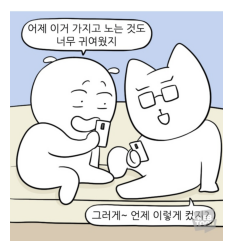

In [2]:
from PIL import Image 
import matplotlib.pyplot as plt 

image_path = "./webtoon1.jpeg"
image = Image.open(image_path).convert("RGB")

plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis("off")
plt.show()

## 2. 이미지에서 텍스트 추출하기

In [3]:
from paddleocr import PaddleOCR

ocr = PaddleOCR(lang="korean")

# image_path = "./webtoon1.jpeg"
result = ocr.ocr(image_path, cls=False) # cls 이미지 정방향으로 바꿔 텍스트 추출
result

[2025/02/21 09:05:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\user/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\user/.paddleocr/whl\\rec\\korean\\korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320'

[[[[[58.0, 43.0], [120.0, 43.0], [120.0, 77.0], [58.0, 77.0]],
   ('어제', 0.9997021555900574)],
  [[[129.0, 43.0], [190.0, 43.0], [190.0, 78.0], [129.0, 78.0]],
   ('이거', 0.9999490976333618)],
  [[[201.0, 45.0], [293.0, 45.0], [293.0, 77.0], [201.0, 77.0]],
   ('가지고', 0.9999604225158691)],
  [[[303.0, 42.0], [368.0, 42.0], [368.0, 81.0], [303.0, 81.0]],
   ('노는', 0.9998180866241455)],
  [[[377.0, 42.0], [438.0, 42.0], [438.0, 77.0], [377.0, 77.0]],
   ('것도', 0.9999890327453613)],
  [[[151.0, 84.0], [212.0, 84.0], [212.0, 119.0], [151.0, 119.0]],
   ('너무', 0.9999880790710449)],
  [[[222.0, 86.0], [344.0, 86.0], [344.0, 118.0], [222.0, 118.0]],
   ('귀여웠지', 0.9994587898254395)],
  [[[267.0, 651.0], [377.0, 651.0], [377.0, 684.0], [267.0, 684.0]],
   ('그러게~', 0.9999236464500427)],
  [[[391.0, 650.0], [453.0, 650.0], [453.0, 686.0], [391.0, 686.0]],
   ('언제', 0.9998664855957031)],
  [[[462.0, 649.0], [557.0, 649.0], [557.0, 686.0], [462.0, 686.0]],
   ('이렇게', 0.9999852180480957)],
  [[[566.0

In [4]:
# result의 길이
print(len(result))

1


In [5]:
print(len(result[0]))

11


In [6]:
for x in result[0]:
    print(len(x))
    print(x[0])
    print(x[1])
    break

2
[[58.0, 43.0], [120.0, 43.0], [120.0, 77.0], [58.0, 77.0]]
('어제', 0.9997021555900574)


In [7]:
# 각 요소들의 의미 파악
# # x[0] : 좌표
# x[1] : 추출된 텍스트, 신뢰도

In [8]:
# 미션
## 1. 빈 리스트를 만든다. box_data, text_data, score_data
## 2. 11개의 데이터를 좌표별, 텍스트별, 신뢰도별로 담는다.

In [9]:
box_data = []
text_data = []
score_data = []

for box, (text, score) in result[0]:
    box_data.append(box)
    text_data.append(text)
    score_data.append(score)

# for box, text_info in result[0]:
#     box_data.append(box)
#     text_data.append(text_info[0])
#     score_data.append(text_info[1])

In [10]:
print(box_data)
print(text_data)
print(score_data)

[[[58.0, 43.0], [120.0, 43.0], [120.0, 77.0], [58.0, 77.0]], [[129.0, 43.0], [190.0, 43.0], [190.0, 78.0], [129.0, 78.0]], [[201.0, 45.0], [293.0, 45.0], [293.0, 77.0], [201.0, 77.0]], [[303.0, 42.0], [368.0, 42.0], [368.0, 81.0], [303.0, 81.0]], [[377.0, 42.0], [438.0, 42.0], [438.0, 77.0], [377.0, 77.0]], [[151.0, 84.0], [212.0, 84.0], [212.0, 119.0], [151.0, 119.0]], [[222.0, 86.0], [344.0, 86.0], [344.0, 118.0], [222.0, 118.0]], [[267.0, 651.0], [377.0, 651.0], [377.0, 684.0], [267.0, 684.0]], [[391.0, 650.0], [453.0, 650.0], [453.0, 686.0], [391.0, 686.0]], [[462.0, 649.0], [557.0, 649.0], [557.0, 686.0], [462.0, 686.0]], [[566.0, 649.0], [655.0, 649.0], [655.0, 687.0], [566.0, 687.0]]]
['어제', '이거', '가지고', '노는', '것도', '너무', '귀여웠지', '그러게~', '언제', '이렇게', '컸지']
[0.9997021555900574, 0.9999490976333618, 0.9999604225158691, 0.9998180866241455, 0.9999890327453613, 0.9999880790710449, 0.9994587898254395, 0.9999236464500427, 0.9998664855957031, 0.9999852180480957, 0.9981598854064941]


In [11]:
# 기존의 이미지에 텍스트를 표현하는 박스 그리기
from paddleocr import draw_ocr 
font_path = "C:/Windows/Fonts/malgun.ttf"
boxes_np = draw_ocr(image, box_data, text_data, score_data, font_path=font_path)
print(boxes_np)

[[[254 255 253]
  [254 255 253]
  [254 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]

 [[254 254 253]
  [254 254 253]
  [254 254 253]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]

 [[252 254 255]
  [252 254 255]
  [252 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]

 ...

 [[216 201 178]
  [216 201 178]
  [216 201 178]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]

 [[216 201 178]
  [216 201 178]
  [216 201 178]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]

 [[216 201 178]
  [216 201 178]
  [216 201 178]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]]


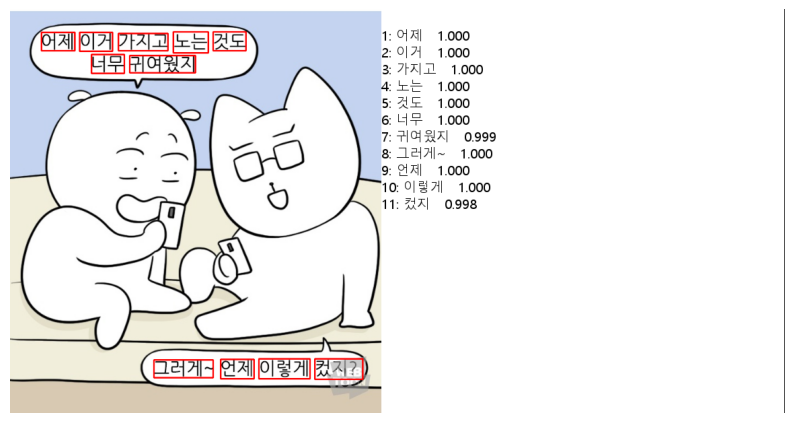

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(boxes_np)
plt.axis("off")
plt.show()

## 3. OCR 활용

* 머신러닝의 DBSCAN

In [19]:
import numpy as np 
from sklearn.cluster import DBSCAN

def point_center(box):
    """
    추출된 텍스트 Box의 중앙 Point를 반환하는 함수
    box는 [x, y, w, h] 형태이다.
    """
    center_x = box[0] + box[2] / 2
    center_y = box[1] + box[3] / 2 

    return np.array([center_x, center_y])

def cluster_boxes(boxes, eps):
    """DBSCAN을 활용하여 추출된 텍스트들을 클러스터링하는 함수"""
    center = np.array([point_center(box) for box in boxes])

    clustering = DBSCAN(eps=eps, min_samples=1).fit(center)
    labels = clustering.labels_

    clusters = {}
    for i, label in enumerate(labels):
        # 기존의 키값이 나오면 요소를 추가한다.
        if label in clusters:
            clusters[label].append(i)
        # 새로운 키값이 나오면 키를 추가하고 리스트 안에 요소를 담는다.
        else:
            clusters[label] = [i]

    return list(clusters.values())

In [18]:
# Point 변수 만들기 
print(f"좌표 [왼쪽위, 오른쪽위, 오른쪽아래, 왼쪽아래]:\n\t {box_data}")

box_point_data = []
for box_point in box_data:
    x1, y1 = box_point[0]
    x2, y2 = box_point[2]

    w = x2 - x1
    h = y2 - y1

    box_point_data.append([int(x1), int(y1), int(w), int(h)])

print(f"[왼쪽위, 오른쪽아래, 너비, 높이]:\n\t {box_point_data}")

좌표 [왼쪽위, 오른쪽위, 오른쪽아래, 왼쪽아래]:
	 [[[58.0, 43.0], [120.0, 43.0], [120.0, 77.0], [58.0, 77.0]], [[129.0, 43.0], [190.0, 43.0], [190.0, 78.0], [129.0, 78.0]], [[201.0, 45.0], [293.0, 45.0], [293.0, 77.0], [201.0, 77.0]], [[303.0, 42.0], [368.0, 42.0], [368.0, 81.0], [303.0, 81.0]], [[377.0, 42.0], [438.0, 42.0], [438.0, 77.0], [377.0, 77.0]], [[151.0, 84.0], [212.0, 84.0], [212.0, 119.0], [151.0, 119.0]], [[222.0, 86.0], [344.0, 86.0], [344.0, 118.0], [222.0, 118.0]], [[267.0, 651.0], [377.0, 651.0], [377.0, 684.0], [267.0, 684.0]], [[391.0, 650.0], [453.0, 650.0], [453.0, 686.0], [391.0, 686.0]], [[462.0, 649.0], [557.0, 649.0], [557.0, 686.0], [462.0, 686.0]], [[566.0, 649.0], [655.0, 649.0], [655.0, 687.0], [566.0, 687.0]]]
[왼쪽위, 오른쪽아래, 너비, 높이]:
	 [[58, 43, 62, 34], [129, 43, 61, 35], [201, 45, 92, 32], [303, 42, 65, 39], [377, 42, 61, 35], [151, 84, 61, 35], [222, 86, 122, 32], [267, 651, 110, 33], [391, 650, 62, 36], [462, 649, 95, 37], [566, 649, 89, 38]]


In [26]:
# 클러스터링 하기
cluster_result = cluster_boxes(box_point_data, eps=120)
cluster_result

[[0, 1, 2, 3, 4, 5, 6], [7, 8, 9, 10]]

In [23]:
print(f"첫번째 그룹: {text_data[0:7]}")
print(f"두번째 그룹: {text_data[7:]}")

첫번째 그룹: ['어제', '이거', '가지고', '노는', '것도', '너무', '귀여웠지']
두번째 그룹: ['그러게~', '언제', '이렇게', '컸지']


In [29]:
# 문장으로 만들기
document_list = []

for cluster in cluster_result:
    print(cluster)
    text = "" 
    for word_idx in cluster:
        text += text_data[word_idx] + " "
    print(text)
    document_list.append(text)

print(f"최종: {document_list}")

[0, 1, 2, 3, 4, 5, 6]
어제 이거 가지고 노는 것도 너무 귀여웠지 
[7, 8, 9, 10]
그러게~ 언제 이렇게 컸지 
최종: ['어제 이거 가지고 노는 것도 너무 귀여웠지 ', '그러게~ 언제 이렇게 컸지 ']


In [ ]:
# 번역 pip install translate 
# 번역 사이트 추천: https://www.deepl.com/ko/translator (API 사용 가능. 무료)
 
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

document_result = []

for sentence in document_list:
    print(sentence)
    translation = translator.translate(sentence)
    print(translation)
    
    document_result.append(translation)

print(f"최종: {document_result}")


어제 이거 가지고 노는 것도 너무 귀여웠지 
It was so cute to play with this yesterday
그러게~ 언제 이렇게 컸지 
Yeah ~ When did I grow up like this?
최종: ['It was so cute to play with this yesterday', 'Yeah ~ When did I grow up like this?']


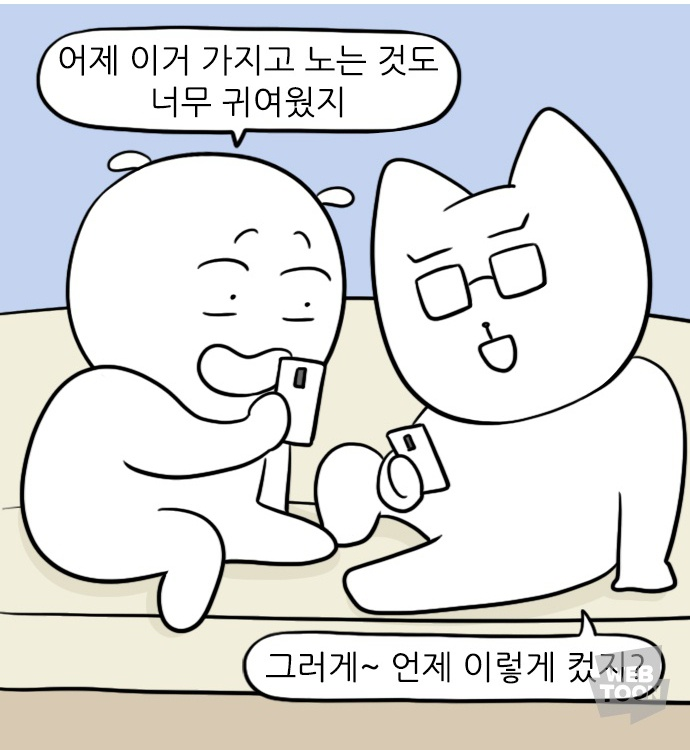

In [38]:
image

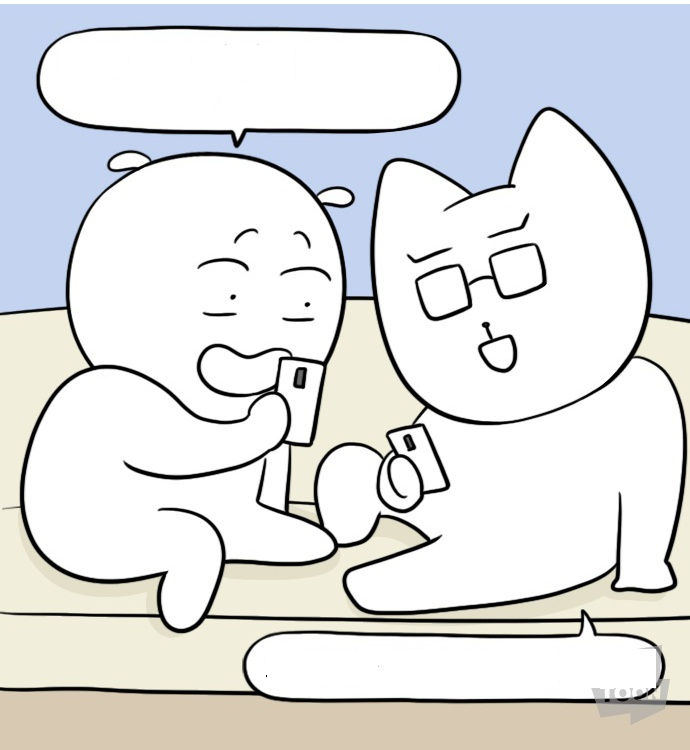

In [42]:
# 이미지 속 텍스트 지우기
from PIL import ImageDraw 

image_new = image.copy()

draw = ImageDraw.Draw(image_new)

for box in box_point_data:
    x1, y1, w, h = box

    x2 = x1 + w
    y2 = y1 + h

    # 비교 draw.rectangle([x1, y1, x2, y2], outline="red")
    draw.rectangle([x1, y1, x2, y2], outline="white", fill="white")

image_new

0 It was so cute to play with this yesterday
[58, 43, 62, 34]
1 Yeah ~ When did I grow up like this?
[267, 651, 110, 33]


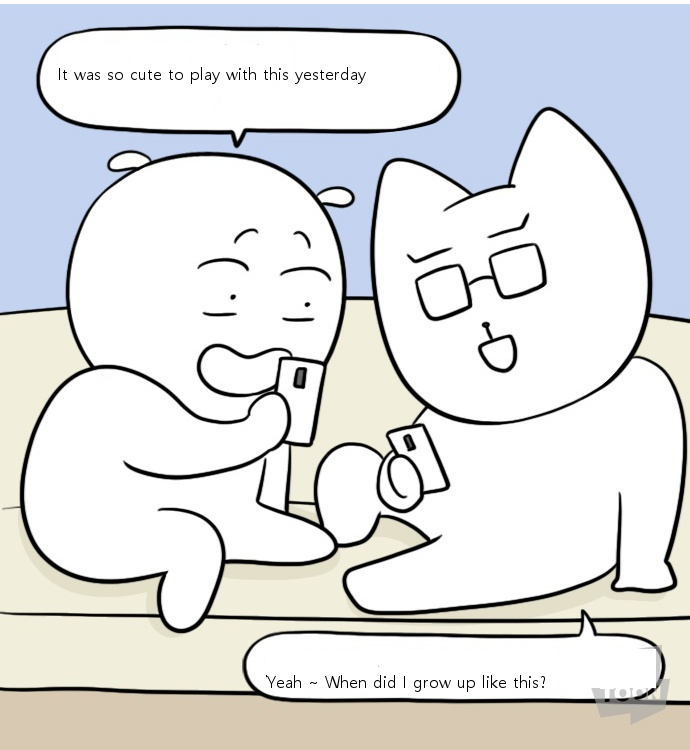

In [45]:
# 번역 넣기 
import textwrap 
from PIL import ImageFont 

image_new2 = image_new.copy()

font_path = "C:/Windows/Fonts/malgun.ttf"

draw = ImageDraw.Draw(image_new2)
font = ImageFont.truetype(font_path, 16)

for idx, eng_text in enumerate(document_result):
    print(idx, eng_text)

    font_height = 16
    line_height = 16 * 1.2

    text_en = textwrap.wrap(eng_text, width=60)

    # 시작점 위치치
    start_idx = cluster_result[idx][0]            

    for text in text_en:
        print(box_point_data[start_idx])
        
        # 시작점 좌표
        text_position = box_point_data[start_idx][0], box_point_data[start_idx][1] + line_height
        # 이미지에 텍스트 넣기기
        draw.text(text_position, text, font=font, fill="black")
        # 다음 줄도 있는 경우
        line_height += font_height 

image_new2
